In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

#**Ejercicio 1**

In [ ]:
def splines_cubicos(xn, yn, dyn):
  x = sp.symbols("x")
  S = []

  #Primera condición
  for j in range(len(xn) - 1):
    string="a%1.f b%1.f c%1.f d%1.f" % (j,j,j,j)
    a,b,c,d = sp.symbols(string)
    Sj = a + (b*(x - xn[j])) + (c*((x - xn[j])**2)) + (d*((x - xn[j])**3))
    valor_a = sp.solve(Sj.subs(x, xn[j]) - yn[j])[0]
    Sj = Sj.subs(a, valor_a)
    valor_b = sp.solve(Sj.subs(x, xn[j+1]) - yn[j+1],b)[0]
    Sj = Sj.subs(b,valor_b)
    S.append(Sj)
  
  #Segunda condicion
  for j in range(len(xn) - 2):
    string="a%1.f b%1.f c%1.f d%1.f" % (j,j,j,j)
    a,b,c,d = sp.symbols(string)
    dSj = sp.diff(S[j], x)
    dSj_1 = sp.diff(S[j+1], x)
    delta_dS = (dSj - dSj_1).subs(x, xn[j+1])
    valor_c = sp.solve(delta_dS, c)[0]
    S[j] = S[j].subs(c, valor_c)
    for i in range(0,j):
      S[i]=S[i].subs(c,valor_c)

  for j in range(len(xn) - 2):
    string="a%1.f b%1.f c%1.f d%1.f" % (j,j,j,j)
    a,b,c,d = sp.symbols(string)
    d2Sj = sp.diff(S[j], x, 2)
    d2Sj_1 = sp.diff(S[j+1], x, 2)
    delta_d2S = (d2Sj - d2Sj_1).subs(x, xn[j+1])
    valor_d = sp.solve(delta_d2S, d)[0]
    S[j] = S[j].subs(d, valor_d)
    for i in range(0,j):
      S[i]=S[i].subs(d,valor_d)
    
  #Fronteras
  string = "c%1.f d%1.f" % (len(xn) - 2, len(xn) - 2)
  c, d = sp.symbols(string)
  valor_c = sp.solve((S[0] - dyn[0]).subs(x, xn[0]), c)[0] #Anotación en Cuadro de Texto
  for j in range(len(xn) - 1):
    S[j] = S[j].subs(c, valor_c)
  valor_d = sp.solve((S[-1] - dyn[-1]).subs(x, xn[-1]), d)[0]
  for j in range(len(xn) - 1):
    S[j] = S[j].subs(d, valor_d)
  for j in range(len(xn) - 1):
    S[j] = S[j].expand()
  return S

Notese que para las funciones $sin(x)$ y $cos(x)$, estas condiciones de frontera no son aplicables puesto que $sin(x) \neq cos(x)$ en todo punto pues una es la función derivada de la otra y por tanto no puede ser aplicada la interpolación sobre estas funciones.

$$S(x_0)\neq dy_0 \wedge S(x_n)\neq dy_n$$

Para poder aplicar dichas condiciones de frontera sería necesario encontrar una función tal que 

$$S(x_0) = dy_0 \wedge S(x_n) = dy_n$$

*Anotación: Dependiendo de los polinomios que se obtengan en la interpolación, para aplicar estas condiciones se debe revisar constantemente los resultados de modo que se aplique primero cierta condición o la otra, y resolver de acuerdo a la variable resultante.

#**Ejercicio 2**

In [ ]:
def grafica_splines(splines, xn, yn): #Funcion de graficacion de la interpolación por Splines, sin que se observe partición de ellos (Grafico Continuo)
  x = sp.symbols("x")
  xlin = np.array([])
  ylin = np.array([])
  for i in range(len(splines)):
    splin_np = sp.lambdify(x, splines[i], "numpy")
    n_xlin = np.linspace(xn[i],xn[i+1])
    n_ylin = splin_np(n_xlin)
    xlin = np.concatenate((xlin, n_xlin), axis = None)
    ylin = np.concatenate((ylin, n_ylin), axis = None)
  plt.plot(xlin, ylin)

In [ ]:
def splines_cubicos_free(xn,yn):
  x = sp.symbols("x")
  S = []

  #Primera condición
  for j in range(len(xn) - 1):
    string="a%1.f b%1.f c%1.f d%1.f" % (j,j,j,j)
    a,b,c,d = sp.symbols(string)
    Sj = a + (b*(x - xn[j])) + (c*((x - xn[j])**2)) + (d*((x - xn[j])**3))
    valor_a = sp.solve(Sj.subs(x, xn[j]) - yn[j])[0]
    Sj = Sj.subs(a, valor_a)
    valor_b = sp.solve(Sj.subs(x, xn[j+1]) - yn[j+1],b)[0]
    Sj = Sj.subs(b,valor_b)
    S.append(Sj)
  
  #Segunda condicion
  for j in range(len(xn) - 2):
    string="a%1.f b%1.f c%1.f d%1.f" % (j,j,j,j)
    a,b,c,d = sp.symbols(string)
    dSj = sp.diff(S[j], x)
    dSj_1 = sp.diff(S[j+1], x)
    delta_dS = (dSj - dSj_1).subs(x, xn[j+1])
    valor_c = sp.solve(delta_dS, c)[0]
    S[j] = S[j].subs(c, valor_c)
    for i in range(0,j):
      S[i]=S[i].subs(c,valor_c)

  for j in range(len(xn) - 2):
    string="a%1.f b%1.f c%1.f d%1.f" % (j,j,j,j)
    a,b,c,d = sp.symbols(string)
    d2Sj = sp.diff(S[j], x, 2)
    d2Sj_1 = sp.diff(S[j+1], x, 2)
    delta_d2S = (d2Sj - d2Sj_1).subs(x, xn[j+1])
    valor_d = sp.solve(delta_d2S, d)[0]
    S[j] = S[j].subs(d, valor_d)
    for i in range(0,j):
      S[i]=S[i].subs(d,valor_d)
    
  #Fronteras
  string = "c%1.f d%1.f" % (len(xn) - 2, len(xn) - 2)
  c, d = sp.symbols(string)
  d2Sj = sp.diff(S[0], x, 2)
  valor_c = sp.solve((d2Sj.subs(x, xn[0])), c)[0]
  for j in range(len(xn) - 1):
    S[j] = S[j].subs(c, valor_c)
  d2Sj_1 = sp.diff(S[-1], x, 2)
  valor_d = sp.solve((d2Sj_1.subs(x, xn[-1])), d)[0]
  for j in range(len(xn) - 1):
    S[j] = S[j].subs(d, valor_d)
  for j in range(len(xn) - 1):
    S[j] = S[j].expand()
  return S

In [ ]:
def splines_cubicos_champ(f,xn,yn):
  x = sp.symbols("x")
  S = []

  #Primera condición
  for j in range(len(xn) - 1):
    string="a%1.f b%1.f c%1.f d%1.f" % (j,j,j,j)
    a,b,c,d = sp.symbols(string)
    Sj = a + (b*(x - xn[j])) + (c*((x - xn[j])**2)) + (d*((x - xn[j])**3))
    valor_a = sp.solve(Sj.subs(x, xn[j]) - yn[j])[0]
    Sj = Sj.subs(a, valor_a)
    valor_b = sp.solve(Sj.subs(x, xn[j+1]) - yn[j+1],b)[0]
    Sj = Sj.subs(b,valor_b)
    S.append(Sj)
  
  #Segunda condicion
  for j in range(len(xn) - 2):
    string="a%1.f b%1.f c%1.f d%1.f" % (j,j,j,j)
    a,b,c,d = sp.symbols(string)
    dSj = sp.diff(S[j], x)
    dSj_1 = sp.diff(S[j+1], x)
    delta_dS = (dSj - dSj_1).subs(x, xn[j+1])
    valor_c = sp.solve(delta_dS, c)[0]
    S[j] = S[j].subs(c, valor_c)
    for i in range(0,j):
      S[i]=S[i].subs(c,valor_c)

  for j in range(len(xn) - 2):
    string="a%1.f b%1.f c%1.f d%1.f" % (j,j,j,j)
    a,b,c,d = sp.symbols(string)
    d2Sj = sp.diff(S[j], x, 2)
    d2Sj_1 = sp.diff(S[j+1], x, 2)
    delta_d2S = (d2Sj - d2Sj_1).subs(x, xn[j+1])
    valor_d = sp.solve(delta_d2S, d)[0]
    S[j] = S[j].subs(d, valor_d)
    for i in range(0,j):
      S[i]=S[i].subs(d,valor_d)
    
  #Fronteras
  string = "c%1.f d%1.f" % (len(xn) - 2, len(xn) - 2)
  c, d = sp.symbols(string)
  dSj = sp.diff(S[0], x)
  df = sp.diff(f, x)
  valor_c = sp.solve(((dSj - df).subs(x, xn[0])), c)[0]
  for j in range(len(xn) - 1):
    S[j] = S[j].subs(c, valor_c)
  dSj_1 = sp.diff(S[-1], x)
  valor_d = sp.solve(((dSj_1 - df).subs(x, xn[-1])), d)[0]
  for j in range(len(xn) - 1):
    S[j] = S[j].subs(d, valor_d)
  for j in range(len(xn) - 1):
    S[j] = S[j].expand()
  return S

In [ ]:
x = sp.symbols("x")
f_sympy = 1/(1+ (x**2))
f_numpy = sp.lambdify(x, f_sympy, "numpy")
xn = np.linspace(-5,5,5)
yn = f_numpy(xn)
xreal = np.linspace(-5,5,100)
yreal = f_numpy(xreal)
splines_free = splines_cubicos_free(xn, yn)
splines_champ = splines_cubicos_champ(f_sympy, xn, yn)

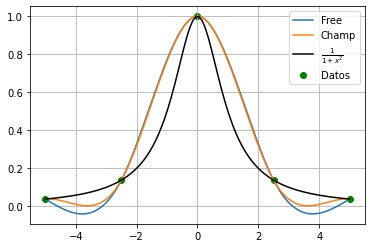

In [ ]:
grafica_splines(splines_free, xn, yn)
grafica_splines(splines_champ, xn, yn)
plt.plot(xreal, yreal, color = "black")
plt.scatter(xn, yn, color = "green")
plt.legend(["Free","Champ","$\\frac{1}{1+x^2}$", "Datos"])
plt.grid()

Text(0.5, 1.0, '$S_{j Champ} - S_{j Free}$')

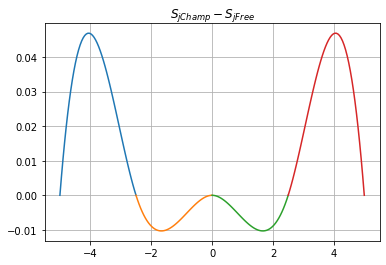

In [ ]:
delta_splin = np.array(splines_champ) - np.array(splines_free) #Lista que contendrá la diferencia entre los valores interpolados por ambos métodos de Splin
for i in range(len(delta_splin)):
  delta_spl_np = sp.lambdify(x, delta_splin[i], "numpy")
  xlin = np.linspace(xn[i],xn[i+1])
  ylin = delta_spl_np(xlin)
  plt.plot(xlin, ylin)
plt.grid()
plt.title("$S_{j Champ} - S_{j Free}$")

In [ ]:
splines_champ[2] - splines_free[2] #Funcion de delta_Splin en el intervalo [-2.5 , 0]

0.00445681639315607*x**3 - 0.0111420409828906*x**2 + 9.55832635263221e-16*x

In [ ]:
splines_champ[3] - splines_free[3] #Funcion de delta_Splin en el intervalo [0 , 2.5]

-0.0133704491794679*x**3 + 0.122562450811789*x**2 - 0.334261229486699*x + 0.278551024572249

Es observable que la diferencia de los polinomios que interpolan desde $[-2.5,0]$ y $[0,2.5]$ tienen signo opuesto en el termino que acompaña a su maximo exponente, $x^3$. 

$$0.00445681639315607x^3 = \alpha$$

$$−0.0133704491794679x^3 = \beta$$

Nos enfocaremos especialmente en estos terminos $(\alpha$ y $\beta)$ pues es quien aporta la mayor cantidad del valor interpolado. 

Notese en en el primer polinomio dicho termino es positivo y se están evaluando valores de $x$ negativos que al ser elevados a la tercera potencia conservarán su signo negativo; esto significa que el signo del valor de $\alpha$ será negativo.

Para el segundo polinomio, el termino acompañante tiene signo negativo y en $x$ se evaluan valores positivos, por tanto el signo del valor de $\beta$ será negativo.

De este modo, dado que entre $[-2.5,0]$ y $[0,2.5]$ se obtienen valores negativos en la diferencia de los Splin, esto explica el valor negativo para los $x\in [-2.5,2.5]$ en $\Delta S$

#**Ejercicio 3**

In [ ]:
def error_splines(splin, f, xn, yn): #Funcion que recibe la función real y los Splin y realiza la diferencia entre los valores arrojados por ellos
  x = sp.symbols("x")
  for i in range(len(splin)):
    spl_np = sp.lambdify(x, splin[i], "numpy") #Conversion de función simbolica a númerica
    xlin = np.linspace(xn[i],xn[i+1])
    ylin = spl_np(xlin)
    yreal = f(xlin)
    error = ylin - yreal #Calculo del error
    plt.plot(xlin, error)

Text(0.5, 1.0, '$S_{j Free} - f(x)$')

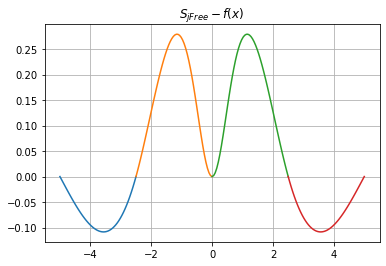

In [ ]:
error_splines(splines_free, f_numpy, xn, yn)
plt.grid()
plt.title("$S_{j Free} - f(x)$")

Text(0.5, 1.0, '$S_{j Champ} - f(x)$')

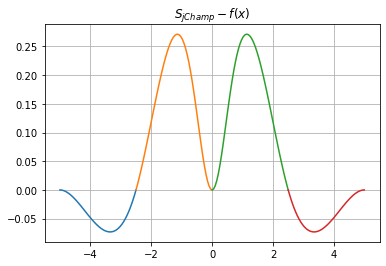

In [ ]:
error_splines(splines_champ, f_numpy, xn, yn)
plt.grid()
plt.title("$S_{j Champ} - f(x)$")

#**Ejercicio 4**

1. Interpolación Lineal: Es la más rápida en su tiempo de ejecución, pero la más inexacta, esto porque al unir puntos por lineas no se obtiene una  única función para todos los puntos, sino funciones lineales para cada par de puntos, esto no permite derivarla en cada punto ya que no es suave y evaluarla requiere n-1 funciones para describir todos las imagenes. 
2. Lagrange Y Newton: Ambas son funciones suaves y que abarcan todos los puntos lo cual elimina los problemas presentador en la interpolacion lineal, sin embargo estos dos metodos no son iguales. Sabemos por el teorema de lagrange que si tenemos n+1 datos tendremos a lo maximo una funcion de grado n que pasa por todos los puntos, y esta es unica, es decir que dentro de las funciones de grado uno hasta n solo hay una que pase por todos los puntos. Ahora, con lo anterior encontramos que en el metodo de lagrange se obtiene una funcion de grado n al realizar el metodo, y es posible que esta funcion se pueda simplificar a un grado menor. Por su parte, el metodo de newton devuelve una funcion ya en su grado mas pequeño posible, lo que elimina este proceso de reducir la funcion como ocurre con el de lagrange. 
3. Hermite: Este metodo es muy similar al de newton, pero tiene una ventaja sobre este, y es que cuando se tiene por ejemplo una funcion muy complicada es normal obtener una cantidad n de datos e interpolar estos para obtener una funcion polinomica que es mas simpley cumple la condicion que pasa por estos, sin embargo uno no solo desea un polinomio que pase por los puntos, sino que tenga el mismo crecimiento (primera derivada) y concavidad (segunda derivada), y esto no lo permite el metodo de newton ni lagrange, pero sí el de hermitte. Por tanto, este metodo se asemejara más a la funcion original que los demas, sin embargo al costo de un mayor tiempo de ejecucion, ya que la funcion obtenida sera de mayor grado que la de los otros metodos. Ademas Hermitte tiene la posibilidad de agregar todas las derivadas que se quiera al costo de un polinomio de mayor grado. 
4. Splines Cúbicos: Cuando se tiene un conjunto de n datos y se desea una interpolacion con un crecimiento estable, splines cubicos es la mejor opcion. 

In [ ]:
#Tarea 3 90/100

#1. Splines Sujetados 20/25
#Es completamente errado el análisis que hace con las funciones seno y coseno
#por un lado resulta que si pueden ser iguales, si una frontera es x=pi/4 Sin(pi/4)=Cos(pi/4)=sqrt(2)/2
#por otro lado, entendiste mal lo que la frontera sujetada se refiere, no tiene que ser 
#que la función f(x)=f'(x), si no que los splines inicial y final: S0'(x0)=f'(x0) y Sf'(xf)=f'(xf).


#2. f(x) n=5 25/30
#a) Splines libres 10/10
#b) Splines sujetados 10/10
#c) Diferencia 5/5
#d) Discusión 0/5
#los coeficientes de los polinomios pueden ser positivos o negativos en diferentes tramos, sí
#pero no es lo que se pide, se necesita hacer el DeltaS = Sfree - Sclamp. Además tomar solo la potencia 3 no
#implica un mayor crecimiento ¿Qué pasa con numeros menores que 1? 
#Debes ser prudente a la hora de hacer análisis apresurados.


#3. Errores 25/25
#a) Splines libres 12/12
#b) Splines sujetados 13/13

#4. Discusión 20/20